In [1]:
!ls

Untitled.ipynb threshold.png


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

(([], []), ([], []))

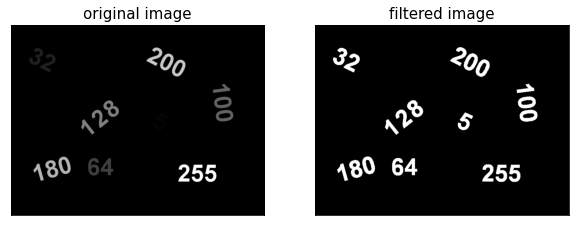

In [12]:
image = cv2.imread('threshold.png')

thresh = 0
maxValue = 255 

th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('filtered image',fontsize=15)
plt.xticks([]), plt.yticks([])

In [21]:
!ls

Untitled.ipynb   boat_initial.jpg threshold.png


(<AxesSubplot:title={'center':'Histogram'}>,
 Text(0.5, 1.0, 'Histogram'))

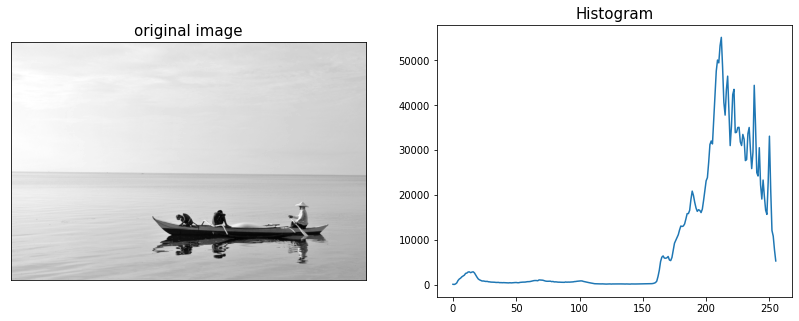

In [93]:
image = cv2.imread('boat_initial.jpg', 0)

hist, bin_edges = np.histogram(image, bins=256)

plt.figure(figsize=(14,5))
plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.plot(hist),plt.title('Histogram',fontsize=15)




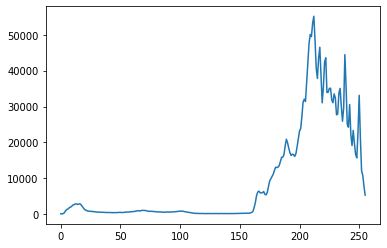

In [26]:
type(hist)

numpy.ndarray

In [53]:
print(bin_edges[:-1].shape)
print(bin_edges[1:].shape)

(256,)
(256,)


Otsu's algorithm implementation thresholding result:  131.982421875


(Text(0.5, 0, 'pixel values'), Text(0, 0.5, 'variance'))

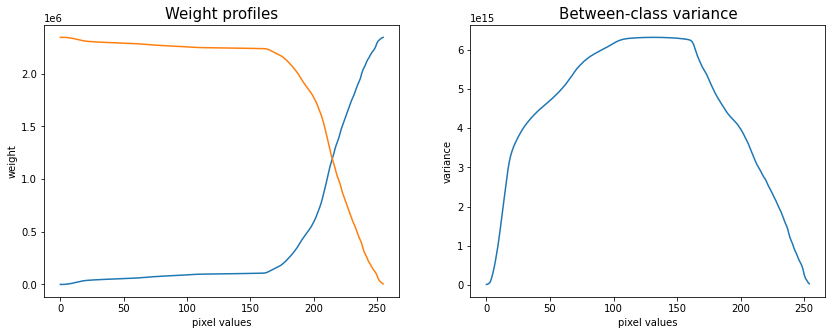

In [96]:
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]

print("Otsu's algorithm implementation thresholding result: ", threshold)


# Plotting weight and between-class variance
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(weight1)
plt.plot(weight2)
plt.title('Weight profiles',fontsize=15)
plt.xlabel('pixel values'), plt.ylabel('weight')

plt.subplot(122)
plt.plot(inter_class_variance)
plt.title('Between-class variance',fontsize=15)
plt.xlabel('pixel values'), plt.ylabel('variance')

In [42]:
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(otsu_threshold)

#132.0 

132.0


(([], []), ([], []))

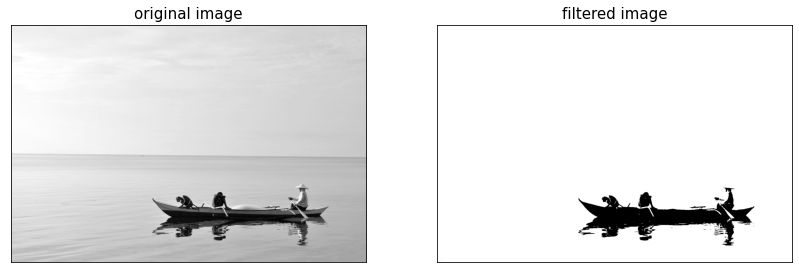

In [97]:
th, dst = cv2.threshold(image, otsu_threshold, maxValue, cv2.THRESH_BINARY)

plt.figure(figsize=(14,5))
plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('filtered image',fontsize=15)
plt.xticks([]), plt.yticks([])


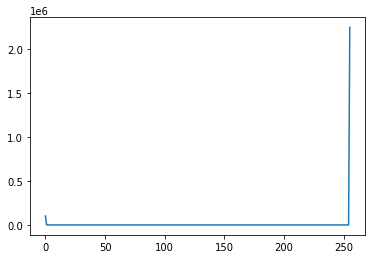

In [71]:
hist_res, idx_res = np.histogram(dst, bins=256)
plt.plot(hist_res)